In [92]:
# Graphs


import tensorflow as tf

import os


def get_section_results(file):
    
    ff = os.listdir(file)
    for fff in ff: 
        print('using file', os.path.join(file, fff))
        eval_returns = []
        eval_std = []
        for e in tf.compat.v1.train.summary_iterator(os.path.join(file, fff)):
            for v in e.summary.value:
                if v.tag == 'Eval_AverageReturn':
                    eval_returns.append(v.simple_value)
                elif v.tag == 'Eval_StdReturn': 
                    eval_std.append(v.simple_value)
        return eval_returns, eval_std

In [93]:
f1 = '/userdata/smetzger/cs285/homework_fall2020/hw2/cs285/scripts/../../data/q1_lb_no_rtg_dsa_CartPole-v0_27-09-2020_16-10-19' 

data_dir = '/userdata/smetzger/cs285/homework_fall2020/hw2/cs285/scripts/../../data/'
import numpy as np
exps = {}
for runs in os.listdir(data_dir): 
    # go through each run, get the latest one (assume thats the goat)
    exp_name = runs.split('-')[0]
    from datetime import datetime as dt
    
    datestr = runs.split('-')[1:]
    datestr = ('_').join(datestr)[3:]
    a = dt.strptime(datestr, "%d_%m_%Y_%H_%M_%S")
#     if 'q3' in runs: 
#         print(runs)
    if not exp_name in exps: 
        exps[exp_name] = (runs, a)
    else: 
        date_old = exps[exp_name][1]
        if a > date_old: 
            exps[exp_name] = (runs, a)
            
            

/userdata/smetzger/cs285/homework_fall2020/hw2/cs285/scripts/../../data/q4_search_b10000_lr0.0050_rtg_nnbaseline_HalfCheetah-v2_28-09-2020_11-05-44
using file /userdata/smetzger/cs285/homework_fall2020/hw2/cs285/scripts/../../data/q4_search_b10000_lr0.0050_rtg_nnbaseline_HalfCheetah-v2_28-09-2020_11-05-44/events.out.tfevents.1601316344.mind7
1.23809015750885
/userdata/smetzger/cs285/homework_fall2020/hw2/cs285/scripts/../../data/q4_search_b10000_lr0.0100_rtg_nnbaseline_HalfCheetah-v2_28-09-2020_11-05-44
using file /userdata/smetzger/cs285/homework_fall2020/hw2/cs285/scripts/../../data/q4_search_b10000_lr0.0100_rtg_nnbaseline_HalfCheetah-v2_28-09-2020_11-05-44/events.out.tfevents.1601316344.mind4
75.46500396728516
/userdata/smetzger/cs285/homework_fall2020/hw2/cs285/scripts/../../data/q4_search_b10000_lr0.0200_rtg_nnbaseline_HalfCheetah-v2_28-09-2020_11-05-44
using file /userdata/smetzger/cs285/homework_fall2020/hw2/cs285/scripts/../../data/q4_search_b10000_lr0.0200_rtg_nnbaseline_HalfC

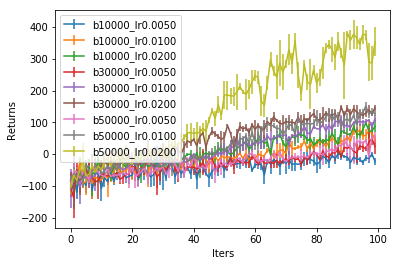

In [101]:

# This is specific to q4

import matplotlib.pyplot as plt
import collections
exps = collections.OrderedDict(sorted(exps.items()))
for k, v in exps.items(): 
    if 'q4' in k and not 'q4_b' in k and not 'lr0.04' in k: 
        v = list(v)
#         v[0] = 'q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_23-03-14'
        print(data_dir + v[0])#'q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_23-03-14')
        returns, stds= get_section_results(data_dir + v[0])
        print(np.max(returns))
        plt.errorbar(np.arange(len(returns)), returns, yerr=stds, label = v[0].split('_rtg')[0][10:])
        plt.xlabel('Iters')
        plt.ylabel('Returns')
        plt.legend()

plt.savefig('./5_q1_sb')

        

# plt.show()

/userdata/smetzger/cs285/homework_fall2020/hw2/cs285/scripts/../../data/q4_b50000_r0.02_HalfCheetah-v2_28-09-2020_11-51-14
using file /userdata/smetzger/cs285/homework_fall2020/hw2/cs285/scripts/../../data/q4_b50000_r0.02_HalfCheetah-v2_28-09-2020_11-51-14/events.out.tfevents.1601319074.mind8
86.01837158203125
/userdata/smetzger/cs285/homework_fall2020/hw2/cs285/scripts/../../data/q4_b50000_r0.02_nnbaseline_HalfCheetah-v2_28-09-2020_11-51-13
using file /userdata/smetzger/cs285/homework_fall2020/hw2/cs285/scripts/../../data/q4_b50000_r0.02_nnbaseline_HalfCheetah-v2_28-09-2020_11-51-13/events.out.tfevents.1601319073.mind7
91.99453735351562
/userdata/smetzger/cs285/homework_fall2020/hw2/cs285/scripts/../../data/q4_b50000_r0.02_rtg_HalfCheetah-v2_28-09-2020_11-51-13
using file /userdata/smetzger/cs285/homework_fall2020/hw2/cs285/scripts/../../data/q4_b50000_r0.02_rtg_HalfCheetah-v2_28-09-2020_11-51-13/events.out.tfevents.1601319073.mind4
168.23341369628906
/userdata/smetzger/cs285/homework

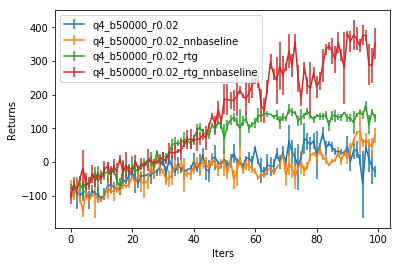

In [112]:

# This is specific to q4

import matplotlib.pyplot as plt
import collections
exps = collections.OrderedDict(sorted(exps.items()))
for k, v in exps.items(): 
    if 'q4_b' in k and not 'lr0.04' in k: 
        v = list(v)
#         v[0] = 'q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_23-03-14'
        print(data_dir + v[0])#'q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_23-03-14')
        returns, stds= get_section_results(data_dir + v[0])
        print(np.max(returns))
        plt.errorbar(np.arange(len(returns)), returns, yerr=stds, label = v[0].split('_Half')[0])
        plt.xlabel('Iters')
        plt.ylabel('Returns')
        plt.legend()

plt.savefig('./5_q1_sb')

        

# plt.show()

/userdata/smetzger/cs285/homework_fall2020/hw2/cs285/scripts/../../data/q3_b40000_r0.005_LunarLanderContinuous-v2_28-09-2020_11-03-43
using file /userdata/smetzger/cs285/homework_fall2020/hw2/cs285/scripts/../../data/q3_b40000_r0.005_LunarLanderContinuous-v2_28-09-2020_11-03-43/events.out.tfevents.1601316223.mind5
272.0865173339844


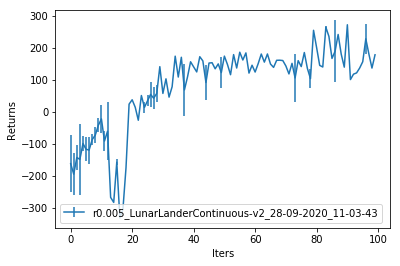

In [114]:
import matplotlib.pyplot as plt
import collections
exps = collections.OrderedDict(sorted(exps.items()))
for k, v in exps.items(): 
    if 'q3' in k: 
        v = list(v)
#         v[0] = 'q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_23-03-14'
        print(data_dir + v[0])#'q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_23-03-14')
        returns, stds= get_section_results(data_dir + v[0])
        print(np.max(returns))
        plt.errorbar(np.arange(len(returns)), returns, yerr=stds, label = v[0].split('_rtg')[0][10:])
        plt.xlabel('Iters')
        plt.ylabel('Returns')
        plt.legend()

plt.savefig('./5_q1_sb')

        

# plt.show()